In [1]:
import pandas as pd

In [2]:
co2 = pd.read_csv('co2.csv', delimiter='\t')

In [3]:
co2

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30
...,...,...
472,2019.375,411.16
473,2019.458,410.35
474,2019.542,408.69
475,2019.625,407.43


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set(style = 'darkgrid', palette = 'Accent')

  ax = sns.lineplot(x = x, y = y, data = dataset)

  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)

  ax = ax

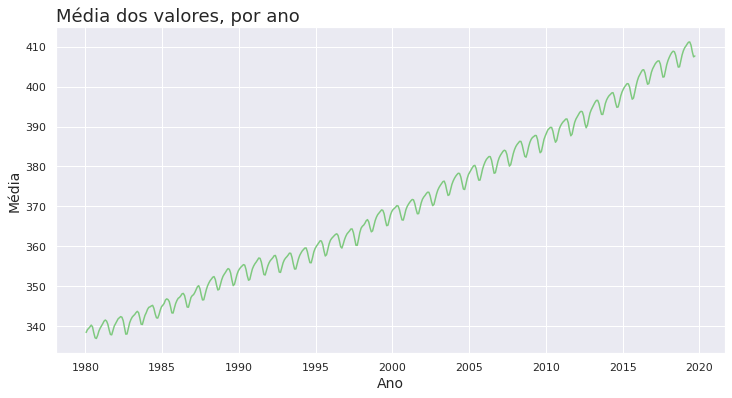

In [6]:
plotar('Média dos valores, por ano', 'Ano', 'Média', 'data', 'media',
       co2)

In [7]:
nasc = pd.read_csv('nascimentos.csv')

In [8]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


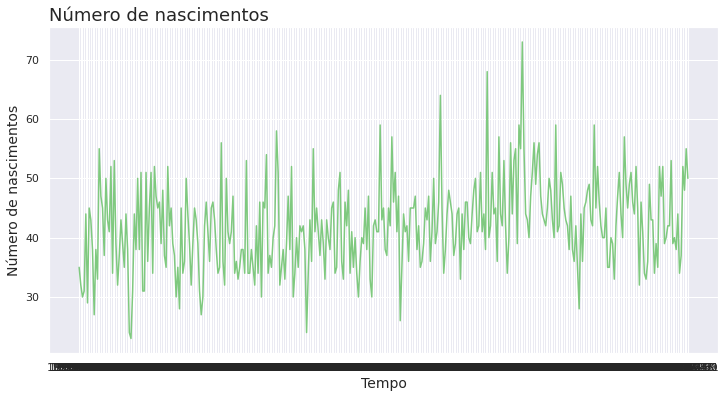

In [9]:
plotar('Número de nascimentos', 'Tempo', 'Número de nascimentos',
       'data', 'n_nasc', nasc)

In [10]:
nasc['data'] = pd.to_datetime(nasc['data'])

In [11]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [12]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


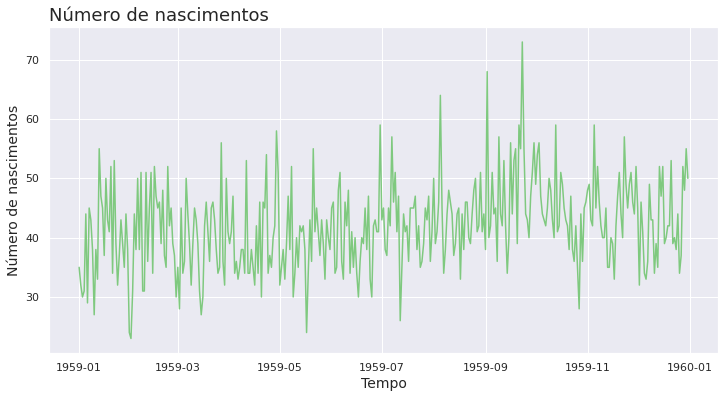

In [13]:
plotar('Número de nascimentos', 'Tempo', 'Número de nascimentos',
       'data', 'n_nasc', nasc)

#Previsões

In [14]:
import numpy as np

In [15]:
media_carb = np.mean(co2['media'])

In [16]:
dt_carb = co2['data'][1] - co2['data'][0]

In [17]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)

  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)

  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)

  ax = ax


Text(0.5, 0, 'data')

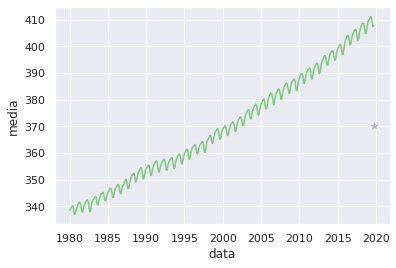

In [18]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0]+dt_carb, media_carb, "*")
plt.ylabel('media')
plt.xlabel('data')

In [19]:
media_nasc = np.mean(nasc['n_nasc'])

In [20]:
dt_nasc = nasc['data'][1] - nasc['data'][0]

Text(0.5, 0, 'data')

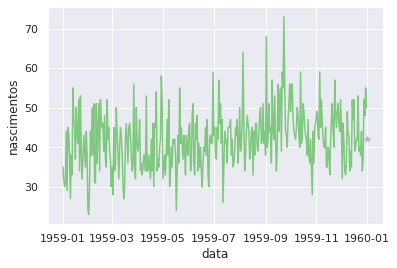

In [21]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0]+dt_nasc, media_nasc, "*")
plt.ylabel('nascimentos')
plt.xlabel('data')

In [22]:
co2.shape

(477, 2)

In [23]:
media_tres = np.mean(co2['media'][474:476])

Text(0.5, 0, 'data')

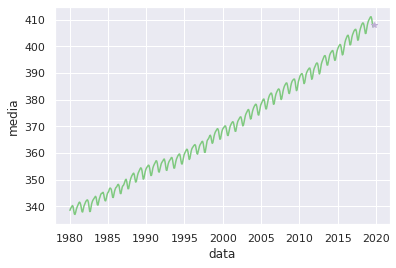

In [24]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0]+dt_carb, media_tres, "*")
plt.ylabel('media')
plt.xlabel('data')

In [25]:
nasc.shape

(365, 2)

In [26]:
media_tres_nasc = np.mean(nasc['n_nasc'][362:364])

Text(0.5, 0, 'data')

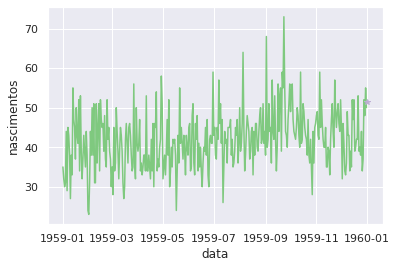

In [27]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0]+dt_nasc, media_tres_nasc, "*")
plt.ylabel('nascimentos')
plt.xlabel('data')

In [28]:
media_movel_c = co2.rolling(5).mean()

Text(0.5, 0, 'data')

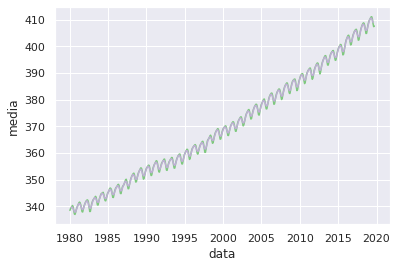

In [29]:
plt.plot(co2['data'], co2['media'])
plt.plot(media_movel_c.data, media_movel_c.media)
plt.ylabel('media')
plt.xlabel('data')

In [30]:
media_movel_n = nasc.rolling(5).mean()
media_movel_n.head()

,n_nasc
0,NaN
1,NaN
2,NaN
3,NaN
4,34.4


Text(0.5, 0, 'data')

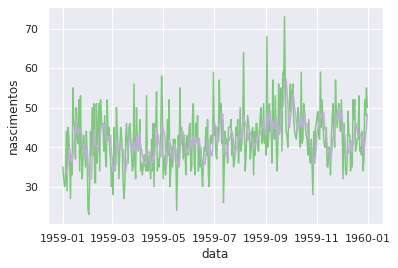

In [31]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc['data'], media_movel_n['n_nasc'])
plt.ylabel('nascimentos')
plt.xlabel('data')

In [32]:
!pip install statsmodels==v0.11.0rc2

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [34]:
result_c = seasonal_decompose(co2.set_index('data'), period = 35)

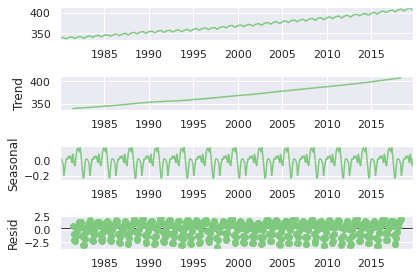

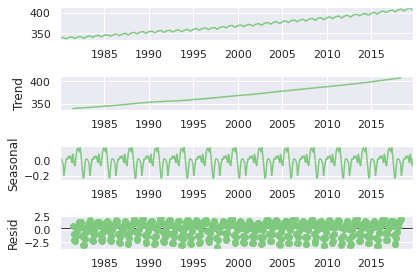

In [35]:
result_c.plot()

In [36]:
observacao   = result_c.observed
tendencia    = result_c.trend
sazonalidade = result_c.seasonal
ruido        = result_c.resid

In [37]:
data = ({
    'observação':observacao,
    'tendência':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
result_c = pd.DataFrame(data)
result_c.head()

,observação,tendência,sazonalidade,ruido
data,,,,
1980.042,338.45,NaN,0.018369,NaN
1980.125,339.15,NaN,0.012545,NaN
1980.208,339.48,NaN,0.009380,NaN
1980.292,339.87,NaN,-0.015059,NaN
1980.375,340.30,NaN,-0.049873,NaN


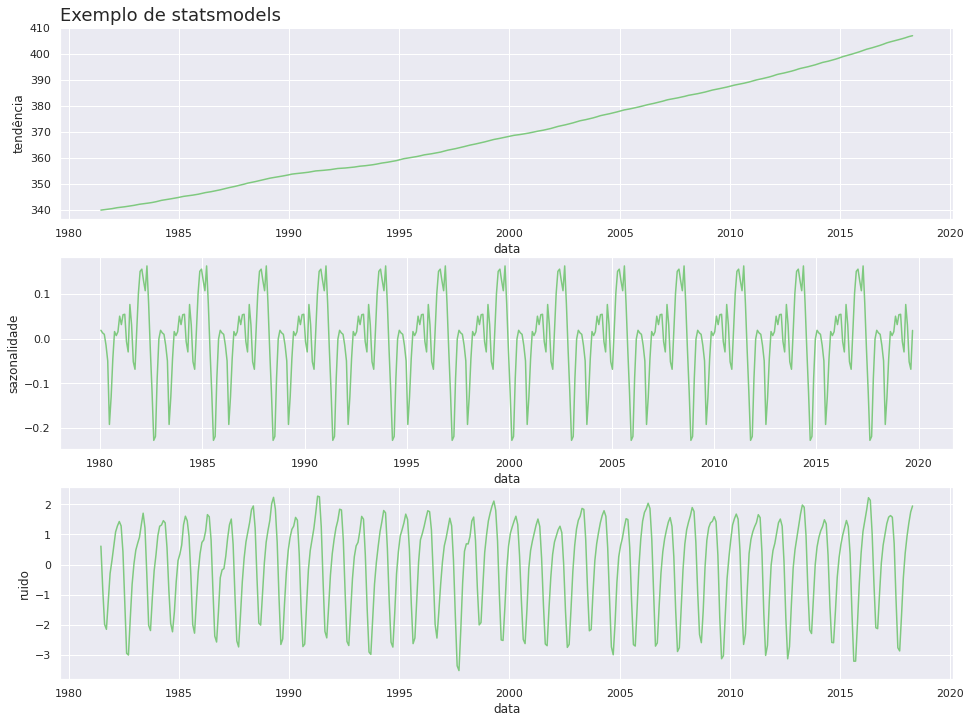

In [38]:
plot_comparacao(result_c.index, 'tendência', 'sazonalidade', 'ruido',
                result_c, 'Exemplo de statsmodels')

In [39]:
result_n = seasonal_decompose(nasc.set_index('data'), period = 35)

In [40]:
observacao_n   = result_n.observed
tendencia_n    = result_n.trend
sazonalidade_n = result_n.seasonal
ruido_n        = result_n.resid

In [41]:
data = ({
    'observação':observacao_n,
    'tendência':tendencia_n,
    'sazonalidade':sazonalidade_n,
    'ruido':ruido_n
})
result_n = pd.DataFrame(data)
result_n.head()

,observação,tendência,sazonalidade,ruido
data,,,,
1959-01-01,35.0,NaN,-0.301261,NaN
1959-01-02,32.0,NaN,-1.002848,NaN
1959-01-03,30.0,NaN,1.019374,NaN
1959-01-04,31.0,NaN,-2.974277,NaN
1959-01-05,44.0,NaN,-4.952054,NaN


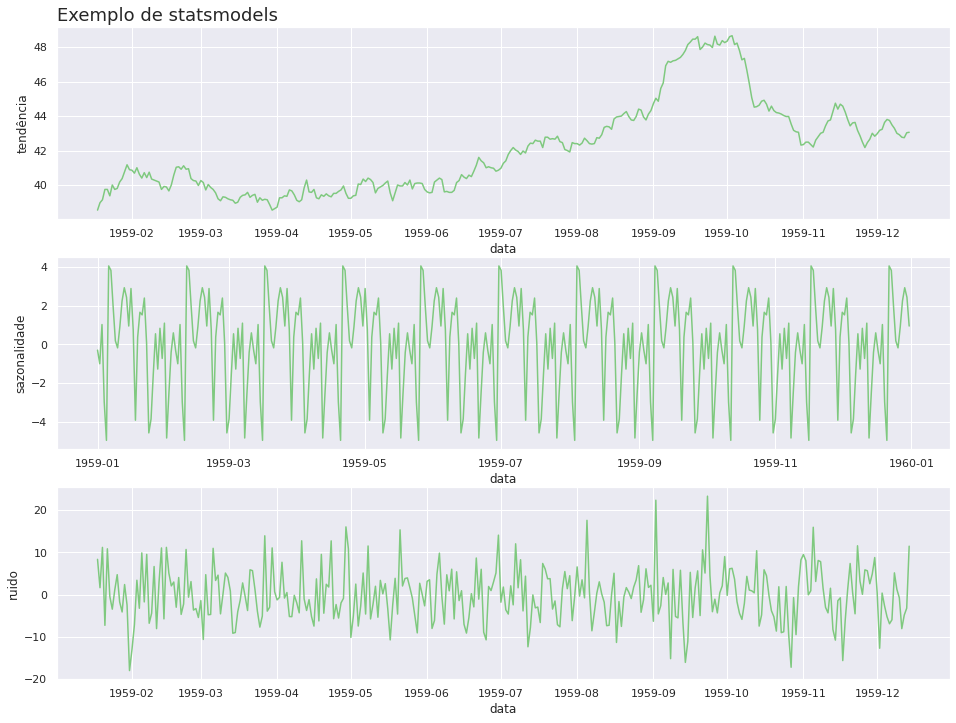

In [42]:
plot_comparacao(result_n.index, 'tendência', 'sazonalidade', 'ruido',
                result_n, 'Exemplo de statsmodels')

#Estacionaridade

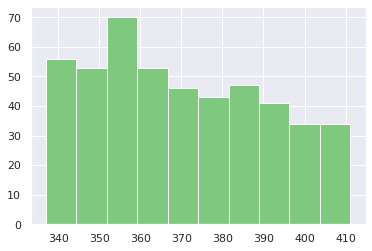

In [43]:
co2['media'].hist() #estacionaridade indica forma gaussiana/normal, séries com tendencia não são estacionarias

In [44]:
divide = int(len(co2)/2)

In [45]:
x = co2['media'].values

In [46]:
c1, c2 = x[0:divide], x[divide:]

In [47]:
c1.mean()

352.31550420168065

In [48]:
c2.mean()

387.816359832636

In [49]:
c1.var()

73.90219533401597

In [50]:
c2.var()

151.542490933282

In [51]:
divide = int(len(nasc)/2)

In [52]:
x_n = nasc['n_nasc'].values

In [53]:
n1, n2 = x_n[0:divide], x_n[divide:]

In [54]:
n1.mean()

39.76373626373626

In [55]:
n2.mean()

44.185792349726775

In [56]:
n1.var()

49.21341021615746

In [57]:
n2.var()

48.708650601690096

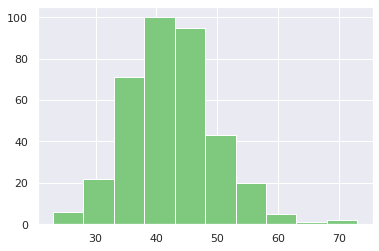

In [58]:
nasc['n_nasc'].hist() #estacionaria

#Teste ADF

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
resultado_c = adfuller(co2['media'].values)

In [61]:
print(f'Estatistica ADF = {resultado_c[0]}') #quanto mais negativo, mais estacionária

Estatistica ADF = 3.036828829167


In [62]:
print(f'p-valor {resultado_c[1]}') #<0.05 é estacionária

p-valor 1.0


In [63]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [64]:
print(f'ADF = {resultado_n[0]}')

ADF = -4.808291253559765


In [65]:
print(f'p-valor = {resultado_n[1]}')

p-valor = 5.2434129901498554e-05


**Séries não estacionárias tem de ter consideradas suas tendencias e sazonalidades**

#Diferenciação

**A diferenciaçãob(derivação) é uma transformação que pode ser aplicada para remover a dependência temporal dos dados, tornando a série estacionária.**

In [97]:
serie_diferenciada = co2['media'].diff()

In [98]:
plt.plot(co2['data'], serie_diferenciada)
plt.ylabel('média')
plt.xlabel('data')

KeyError: ignored

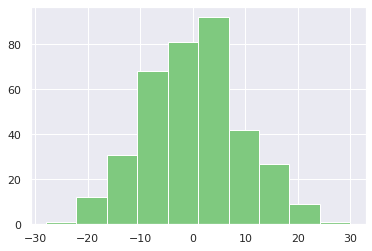

In [68]:
serie_diferenciada.hist() #sua derivada é estacionária

#Exp Smoothing

In [69]:
co2 = co2.set_index('data')
co2.head()

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30


In [70]:
from sklearn.model_selection import train_test_split

In [77]:
co2_treino = co2[1980.042:2015]
co2_teste  = co2[2015:]

In [73]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [75]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level = 0.5)
modelo_ajustado

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [78]:
co2_teste.shape

(57, 1)

In [79]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


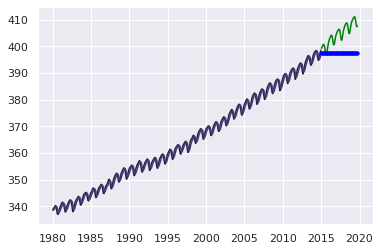

In [86]:
sns.set(style = 'darkgrid', palette = 'mako')
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto, 'b.')

In [87]:
nasc = nasc.set_index('data')

In [88]:
nasc_treino = nasc['1959-01-01':'1959-12-01']

In [89]:
nasc_teste = nasc['1959-12-01':]

In [90]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level = 0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [91]:
nasc_teste.shape

(31, 1)

In [95]:
modelo_previsto = modelo_ajustado.forecast(nasc_teste.shape[0])

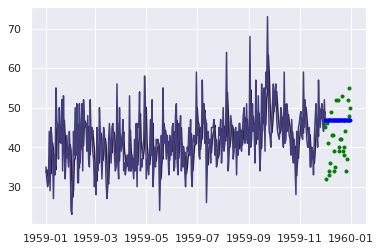

In [96]:
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g.')
plt.plot(nasc_teste.index, modelo_previsto, 'b.')

#HoltWinters

**Y_t = Nível + Tendência + Sazonalidade + Ruído**  

*   Tendência aditiva
*   **E_(t+k) = N_t + kT_t**
*   Atualização do nível
*   **N_t = aY_t + (1-a)(N_(t-1) + T_(t-1))**





In [100]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [101]:
modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend = 'additive', 
                     seasonal = 'additive', seasonal_periods = 35).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [112]:
modelo_previsto = modelo_ajustado.predict(start = co2.shape[0] - co2_teste.shape[0],
                                          end = co2.shape[0] - 1 )

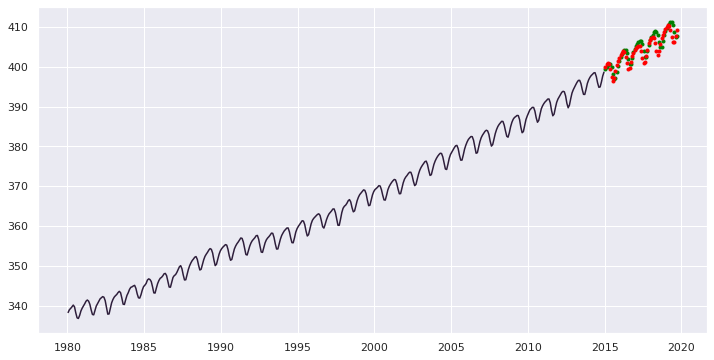

In [116]:
plt.figure(figsize = (12,6))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g.')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [117]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend = 'multiplicative', 
                     seasonal = None).fit()

In [119]:
modelo_previsto = modelo_ajustado.predict(start = nasc.shape[0] - nasc_teste.shape[0],
                                          end = nasc.shape[0] - 1 )

In [128]:
sns.__version__

'0.10.1'

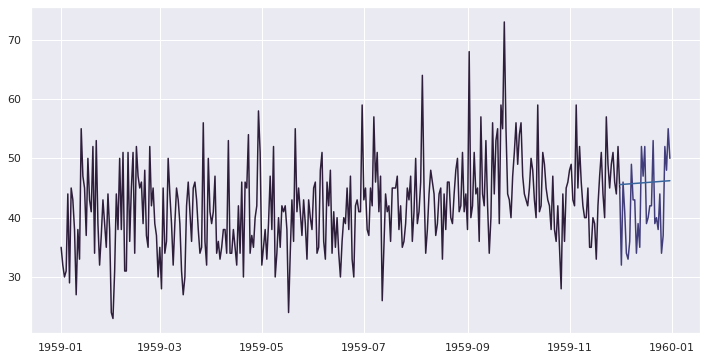

In [129]:
sns.color_palette("mako")
plt.figure(figsize = (12,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste)
plt.plot(nasc_teste.index, modelo_previsto)

#Autocorrelação

**Quanto maior a função de correlação, mais parecidos são os vetores**

In [130]:
from statsmodels.graphics.tsaplots import plot_acf

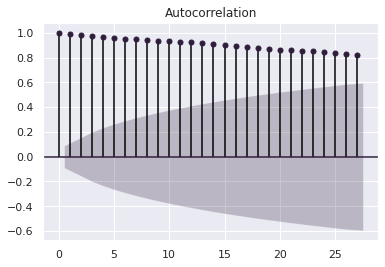

In [137]:
plot_acf(co2); # correlações relacionadas à sazionalidade dos dados

## Autocorrelação Parcial

In [138]:
from statsmodels.graphics.tsaplots import plot_pacf

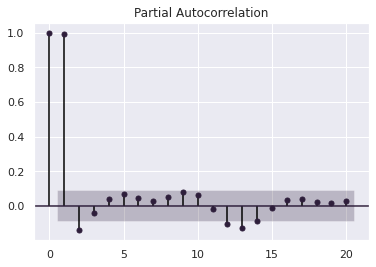

In [140]:
plot_pacf(co2, lags = 20);

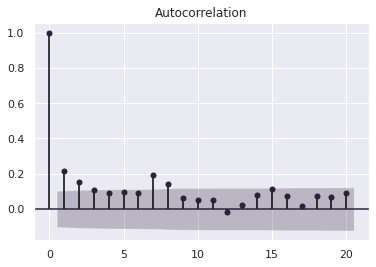

In [144]:
plot_acf(nasc['n_nasc'], lags = 20);

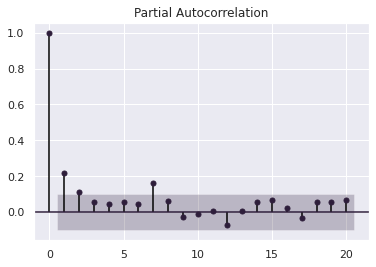

In [145]:
plot_pacf(nasc['n_nasc'], lags = 20);

In [146]:
from statsmodels.tsa.ar_model import AutoReg

In [147]:
lista = np.linspace(1, 40, 40)

In [149]:
modelo_ajustado = AutoReg(co2_treino.values, lags = lista, trend = 'c', seasonal = True,
        period = 35).fit()

In [154]:
modelo_previsto = modelo_ajustado.predict(start = 420, end = 476)

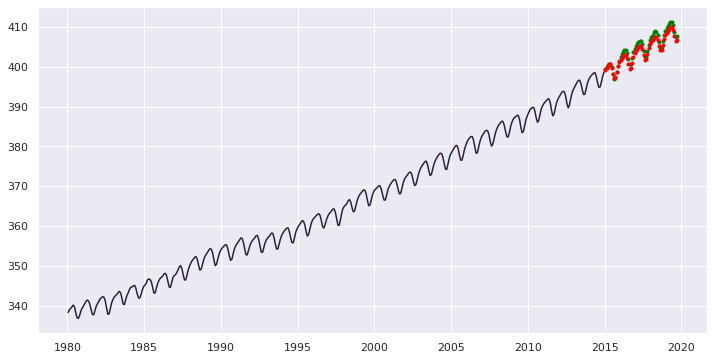

In [155]:
plt.figure(figsize = (12,6))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g.')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [156]:
modelo_ajustado = AutoReg(nasc_treino.values, lags = lista, trend = 'c', seasonal = True,
        period = 35).fit()

In [157]:
modelo_previsto = modelo_ajustado.predict(start = 335, end = 365)

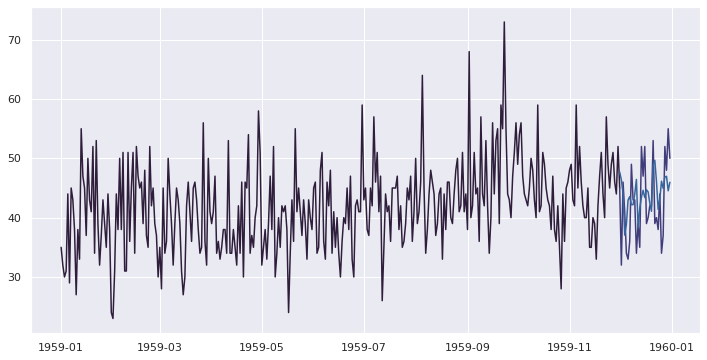

In [158]:
sns.color_palette("mako")
plt.figure(figsize = (12,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste)
plt.plot(nasc_teste.index, modelo_previsto)

#Performance

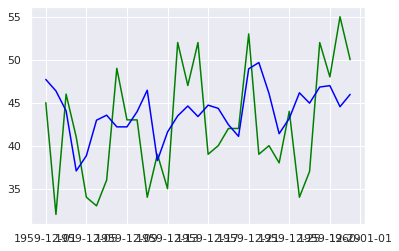

In [159]:
plt.plot(nasc_teste,'g', label = 'valor_real')
plt.plot(nasc_teste.index, modelo_previsto, 'b-', label = 'previsão') 

In [160]:
Erro_prev = nasc_teste['n_nasc'] - modelo_previsto

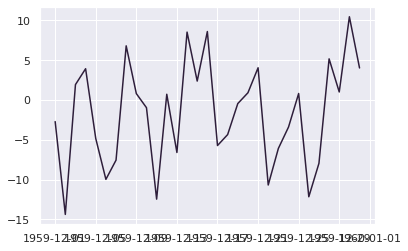

In [161]:
plt.plot(Erro_prev)

In [162]:
np.mean(Erro_prev)

-1.6083080804496934

In [163]:
np.mean(np.abs(Erro_prev))

5.496720548092117

In [164]:
from sklearn.metrics import mean_absolute_error

In [165]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto)

In [166]:
mae

5.496720548092117

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
mse = mean_squared_error(nasc_teste['n_nasc'], modelo_previsto)

In [169]:
mse

45.43739422181245